<a href="https://colab.research.google.com/github/jacks-li/T1-CHL5230-F23-DT6/blob/main/Final_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn
!pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from category_encoders import OneHotEncoder, TargetEncoder
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [ ]:
## Uploading the Data

from google.colab import files
uploaded = files.upload()

Saving diabetes.xlsx to diabetes.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['diabetes.xlsx']))

In [ ]:
# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65,126.0,2013-06-11,31.000000,2013-06-11,1.66,2013-06-14,1.11,2013-06-14,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000255903,NaT,NaT,No
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256456,NaT,NaT,No
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000259496,NaT,NaT,No
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000262094,NaT,NaT,No


**Initial data inspection**

In [ ]:
#description of features
print(df.shape)
description = df.describe()
description

(10000, 43)


,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,Patient_ID
count,10000.000000,9996.000000,10000.000000,9939.000000,9928.000000,10000.000000,9947.000000,10000.000000,10000.000000,9793.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5406.000000,5137.000000,5411.000000,5137.000000,1.000000e+04
mean,63.197600,130.394358,30.415909,2.540959,1.321803,6.266754,1.553615,6.311903,0.922800,4.558164,0.513900,0.212200,0.642400,0.315600,0.098600,41210.426193,40014.597820,41125.007577,39943.999221,3.940949e+15
std,13.127627,17.018794,6.831567,0.949213,0.402217,0.954380,1.021511,1.733209,0.266922,1.136145,0.499832,0.408886,0.479317,0.464778,0.298139,723.369067,1021.388765,766.210873,971.454948,2.401364e+15
min,18.000000,60.000000,1.376352,0.070000,0.160000,3.400000,0.240000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37966.000000,32509.000000,38023.000000,32509.000000,1.001000e+15
25%,54.000000,120.000000,25.898654,1.820000,1.040000,5.700000,0.950000,5.200000,1.000000,3.710000,0.000000,0.000000,0.000000,0.000000,0.000000,40785.000000,39286.000000,40643.000000,39254.000000,2.001000e+15
50%,64.000000,130.000000,29.300000,2.400000,1.250000,6.000000,1.320000,5.900000,1.000000,4.450000,1.000000,0.000000,1.000000,0.000000,0.000000,41402.000000,39944.000000,41298.000000,39918.000000,4.001000e+15
75%,73.000000,140.000000,33.790000,3.160000,1.540000,6.600000,1.890000,6.900000,1.000000,5.300000,1.000000,0.000000,1.000000,1.000000,0.000000,41773.000000,40770.000000,41745.000000,40687.000000,4.001000e+15
max,90.000000,229.000000,73.400000,8.630000,3.960000,14.300000,22.640000,23.500000,1.000000,12.660000,1.000000,1.000000,1.000000,1.000000,1.000000,42184.000000,42185.000000,42184.000000,42157.000000,1.000100e+16


In [ ]:
#number of unique patients
df['Patient_ID'].nunique()

8602

In [ ]:
# Checking for missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

Missing data important to note:

* 2 entries of yes diabetes do not have diabetes date (4861 no diabetes, 4863 missing diabetes date) - MCRA
* 4 sBP missing 0 missing sBP date - MCAR
* 61 LDL missing 0 missing LDL date - MCAR
* 72 HDL missing 64 missing HDL date - MCAR
* 53 TG missing 42 missing TG date - MCAR
* 207 missing cholesterole 197 missing cholesterole date - MCAR
* 4863 missing from A1C_BEF_DM and FBS_BEF_DM, matches with number of patients who do not have diabetes* - MNAR
* DM_Onset variables also matches with number of patients without diabetes* - MNAR

Other points to note:
* No definition for leastO and LeastOfAll columns - could also be related to patients without diabetes? missing seems to match - MNAR
Checked with Dr. K. Keshavjee- Reply: "You can safely ignore those.  I used them to calculate a truer date of onset of diabetes. The previous one was not correct in most cases."




In [ ]:
df.dtypes

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

In [ ]:
#replaces features outside of acceptable value ranges
df['sBP'] = df['sBP'].where((60 <= df['sBP']) & (df['sBP'] <= 267))
df['BMI'] = df['BMI'].where((10 <= df['BMI']) & (df['BMI'] <= 60))
df['A1c'] = df['A1c'].where((3 <= df['A1c']) & (df['A1c'] <= 17.8))
df['FBS'] = df['FBS'].where((1.3 <= df['FBS']) & (df['FBS'] <= 23))
df['LDL'] = df['LDL'].where((0.5 <= df['LDL']) & (df['LDL'] <= 10))

In [ ]:
#description of features
print(df.shape)
description = df.describe()
description

(10000, 43)


,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,Patient_ID
count,10000.000000,9996.000000,9950.000000,9930.000000,9928.000000,10000.000000,9947.000000,9999.000000,10000.000000,9793.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5406.000000,5137.000000,5411.000000,5137.000000,1.000000e+04
mean,63.197600,130.394358,30.252554,2.542964,1.321803,6.266754,1.553615,6.310184,0.922800,4.558164,0.513900,0.212200,0.642400,0.315600,0.098600,41210.426193,40014.597820,41125.007577,39943.999221,3.940949e+15
std,13.127627,17.018794,6.384266,0.947293,0.402217,0.954380,1.021511,1.724750,0.266922,1.136145,0.499832,0.408886,0.479317,0.464778,0.298139,723.369067,1021.388765,766.210873,971.454948,2.401364e+15
min,18.000000,60.000000,11.810000,0.500000,0.160000,3.400000,0.240000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37966.000000,32509.000000,38023.000000,32509.000000,1.001000e+15
25%,54.000000,120.000000,25.875937,1.820000,1.040000,5.700000,0.950000,5.200000,1.000000,3.710000,0.000000,0.000000,0.000000,0.000000,0.000000,40785.000000,39286.000000,40643.000000,39254.000000,2.001000e+15
50%,64.000000,130.000000,29.280000,2.410000,1.250000,6.000000,1.320000,5.900000,1.000000,4.450000,1.000000,0.000000,1.000000,0.000000,0.000000,41402.000000,39944.000000,41298.000000,39918.000000,4.001000e+15
75%,73.000000,140.000000,33.692821,3.160000,1.540000,6.600000,1.890000,6.900000,1.000000,5.300000,1.000000,0.000000,1.000000,1.000000,0.000000,41773.000000,40770.000000,41745.000000,40687.000000,4.001000e+15
max,90.000000,229.000000,60.000000,8.630000,3.960000,14.300000,22.640000,21.200000,1.000000,12.660000,1.000000,1.000000,1.000000,1.000000,1.000000,42184.000000,42185.000000,42184.000000,42157.000000,1.000100e+16


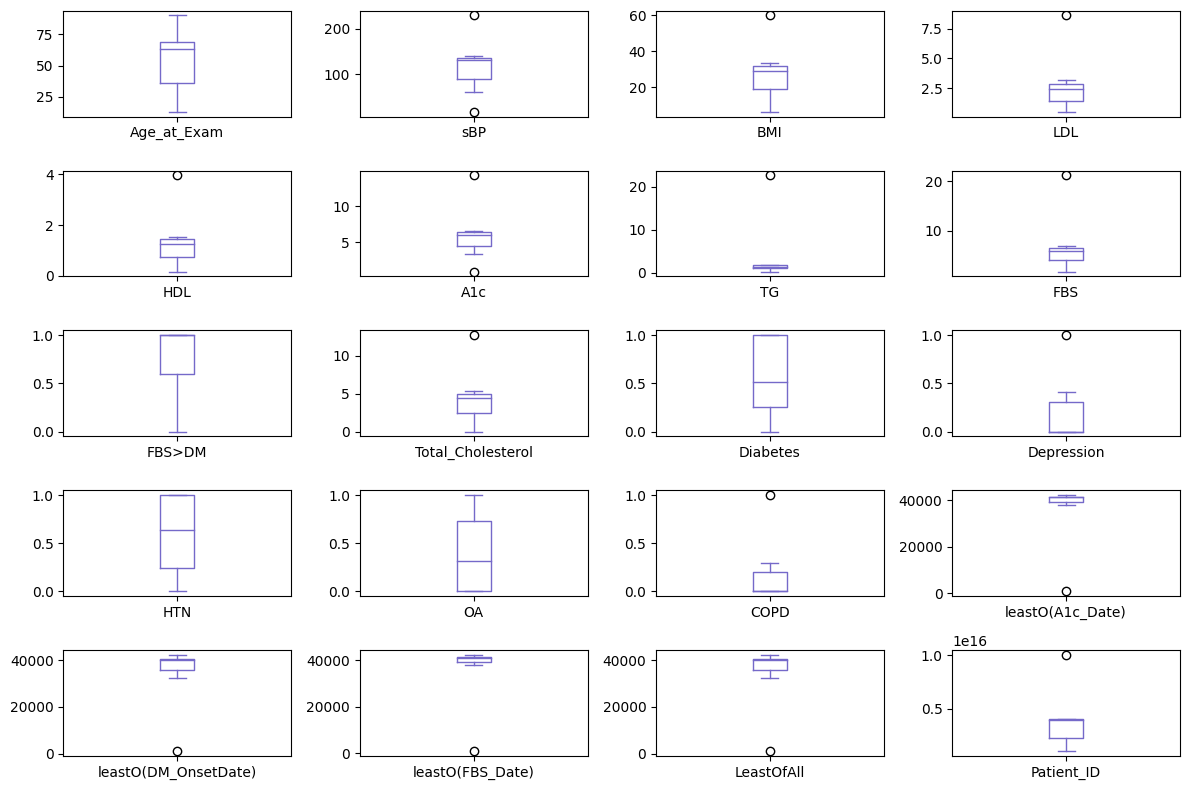

In [ ]:
#boxplot of features
description = description.drop('count')
description.plot(kind='box', subplots=True, layout=(5, 4), figsize=(12, 8), color='#7569c9')
plt.tight_layout()
plt.show()

In [ ]:
# Checking for missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                          50
BMI_Date                                      0
LDL                                          70
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           1
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

In [ ]:
#list of all features that are categorical
features_categorical = ['Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex', 'FBS>DM', 'A1C_BEF_DM', 'FBS_BEF_DM'] #did not include medications because many are combination, too many categories

for i, feature in enumerate(features_categorical):
  #Graph distribution of categories
  counts = df[feature].value_counts()

  # Define your color sequence
  colors = ['#1c3a73', '#7cb1c2']

  fig = px.pie(
      names=counts.index,
      values=counts.values,
      hole=0.5,  # size of the hole, 0.5 means 50%
      title='Distribution of ' + feature,
      color_discrete_sequence=colors  # apply your colors here
  )

  # Update layout for better appearance
  fig.update_layout(
      margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
      legend=dict(
          orientation="v",
          yanchor="top",
          y=0.5,
          xanchor="left",
          x=1.05,
          title=feature
      ),
      title=dict(
          text='Distribution of ' + feature,
          x=0.45,  # Centering the title
          xanchor='center',
          y=0.95,  # Adjusting y position to place title above chart
          yanchor='top',
          font=dict(size=16)
      ),
      width=500,
      height=350
  )

  fig.show()

**Initial Feature Selection and Imputation**

In [ ]:
# Feature selection
selected_features = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM', 'Total_Cholesterol', 'Diabetes', 'HTN', 'OA', 'COPD', 'Sex', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Depression', 'Patient_ID']
selected_df_features = df[selected_features]
print(selected_df_features.isna().sum())

Age_at_Exam             0
sBP                     4
BMI                    50
LDL                    70
HDL                    72
A1c                     0
TG                     53
FBS                     1
FBS>DM                  0
Total_Cholesterol     207
Diabetes                0
HTN                     0
OA                      0
COPD                    0
Sex                     0
A1C_BEF_DM           4863
FBS_BEF_DM           4863
Depression              0
Patient_ID              0
dtype: int64


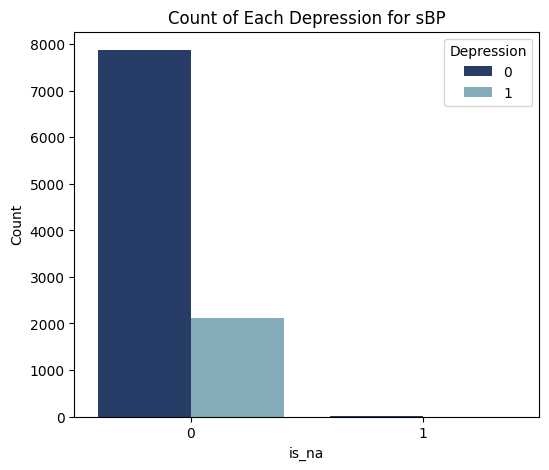

is_na
0    9996
1       4
Name: Depression, dtype: int64


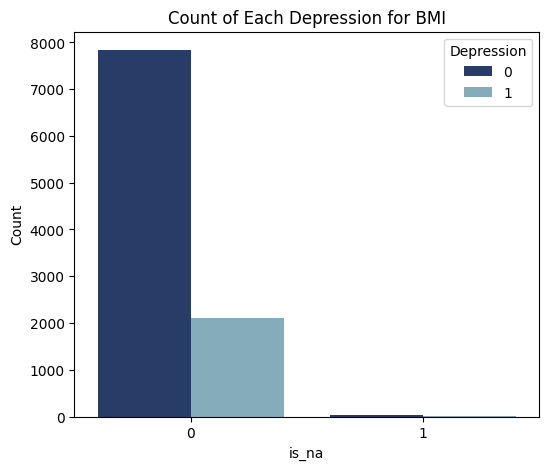

is_na
0    9950
1      50
Name: Depression, dtype: int64


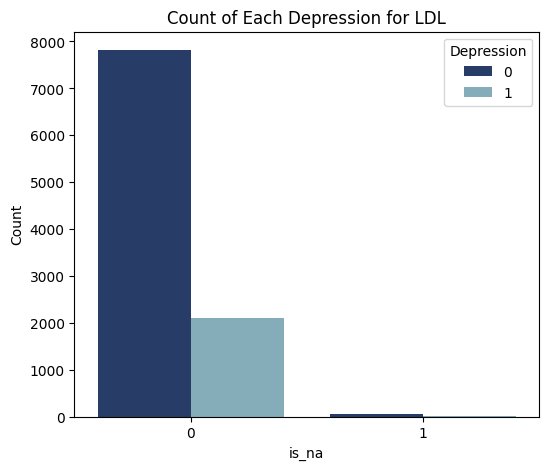

is_na
0    9930
1      70
Name: Depression, dtype: int64


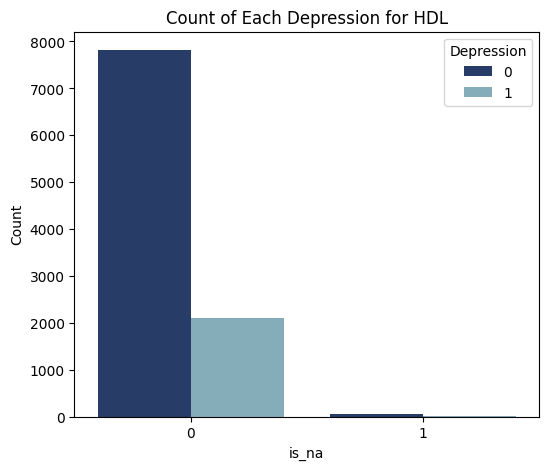

is_na
0    9928
1      72
Name: Depression, dtype: int64


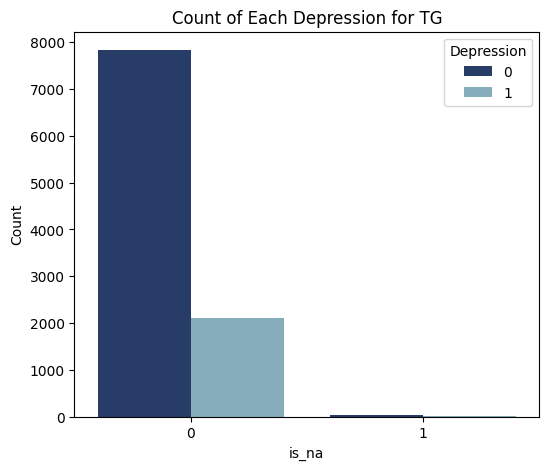

is_na
0    9947
1      53
Name: Depression, dtype: int64


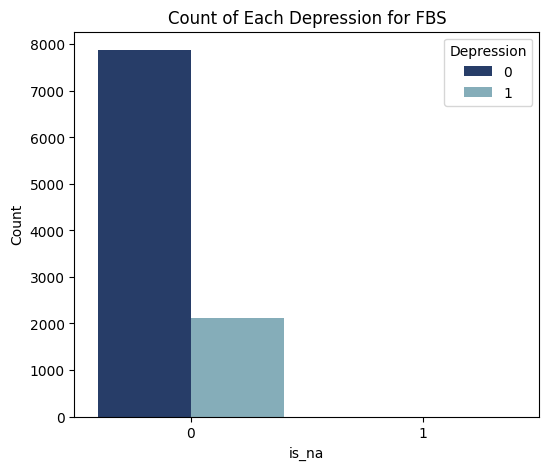

is_na
0    9999
1       1
Name: Depression, dtype: int64


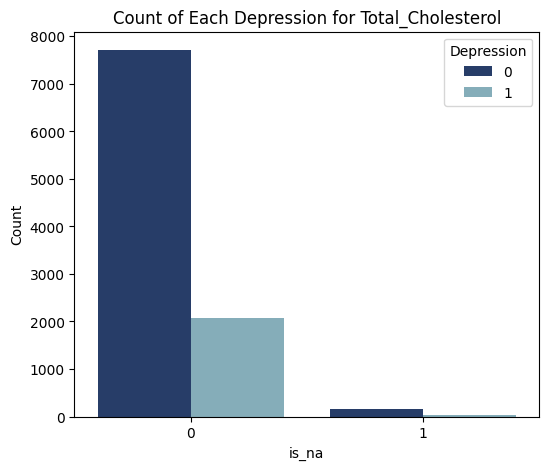

is_na
0    9793
1     207
Name: Depression, dtype: int64


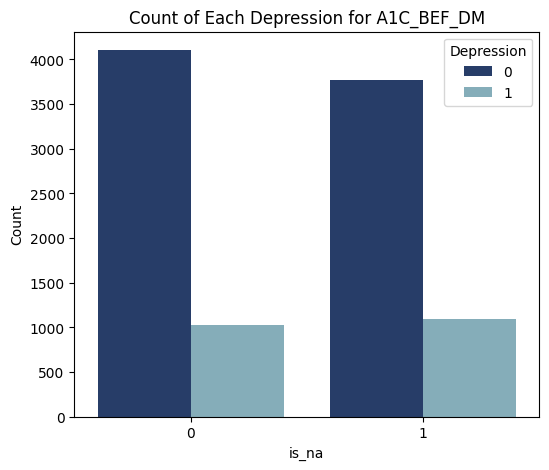

is_na
0    5137
1    4863
Name: Depression, dtype: int64


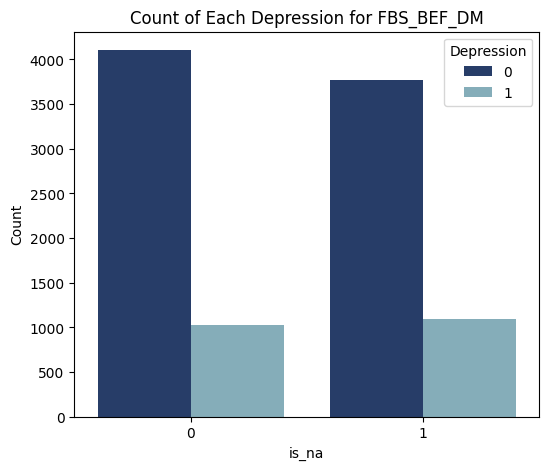

is_na
0    5137
1    4863
Name: Depression, dtype: int64


In [ ]:
# Understanding missing values and effect on Depression
for i, column in enumerate(selected_df_features):
  if selected_df_features[column].isna().sum() > 0:
    # Create a binary indicator column 'is_ethnicity_na' to represent missing values in the 'ethnicity' column
    selected_df_features['is_na'] = selected_df_features[column].isna().astype(int)

    # Convert the 'Class/ASD' column to string data type
    selected_df_features['Depression'] = selected_df_features['Depression'].astype(str)

    # Define a list of colors for the countplot
    colors = ['#1c3a73', '#7cb1c2']

    # Create a grouped bar chart using seaborn's countplot function with specified colors
    plt.figure(figsize=(6, 5))
    sns.countplot(data=selected_df_features, x='is_na', hue='Depression', palette=colors)

    # Set labels and title for the plot
    plt.xlabel('is_na')
    plt.ylabel('Count')
    plt.title('Count of Each Depression for ' + column)
    plt.legend(title='Depression')
    plt.show()

    # Convert the 'Class/ASD' column back to integer data type
    selected_df_features['Depression'] = selected_df_features['Depression'].astype(int)

    # Calculate the mean of 'Class/ASD' grouped by 'is_ethnicity_na' and print the result
    print(selected_df_features.groupby('is_na')['Depression'].count())

    # Remove the 'is_ethnicity_na' column from the DataFrame
    selected_df_features.drop('is_na', axis=1, inplace=True)

In [ ]:
selected_df_features.dtypes

Age_at_Exam            int64
sBP                  float64
BMI                  float64
LDL                  float64
HDL                  float64
A1c                  float64
TG                   float64
FBS                  float64
FBS>DM                 int64
Total_Cholesterol    float64
Diabetes               int64
HTN                    int64
OA                     int64
COPD                   int64
Sex                   object
A1C_BEF_DM            object
FBS_BEF_DM            object
Depression             int64
Patient_ID             int64
dtype: object

In [ ]:
# create list of numerical, categorical, multinomial features
target_column = 'Depression'
categorical_columns = ['Sex', 'A1C_BEF_DM', 'FBS_BEF_DM']
boolean_columns = ['HTN', 'OA', 'COPD', 'FBS>DM', 'Diabetes']
ID_columns = 'Patient_ID'
numerical_columns = [i for i in selected_df_features.columns if i not in categorical_columns + [target_column] + boolean_columns + [ID_columns]]

In [ ]:
# convert boolean to int
selected_df_features['A1C_BEF_DM'] = selected_df_features['A1C_BEF_DM']*1
selected_df_features['FBS_BEF_DM'] = selected_df_features['FBS_BEF_DM']*1

In [ ]:
for i in categorical_columns:
  selected_df_features[i] = selected_df_features[i].astype('category')
selected_df_features.dtypes

Age_at_Exam             int64
sBP                   float64
BMI                   float64
LDL                   float64
HDL                   float64
A1c                   float64
TG                    float64
FBS                   float64
FBS>DM                  int64
Total_Cholesterol     float64
Diabetes                int64
HTN                     int64
OA                      int64
COPD                    int64
Sex                  category
A1C_BEF_DM           category
FBS_BEF_DM           category
Depression              int64
Patient_ID              int64
dtype: object

In [ ]:
# Fill NAN values with NA since these patients were not diabetic
selected_df_features['A1C_BEF_DM'] = selected_df_features['A1C_BEF_DM'].cat.add_categories('NA')
selected_df_features['A1C_BEF_DM'].fillna('NA', inplace=True)
selected_df_features['FBS_BEF_DM'] = selected_df_features['FBS_BEF_DM'].cat.add_categories('NA')
selected_df_features['FBS_BEF_DM'].fillna('NA', inplace=True)

In [ ]:
for i in categorical_columns:
  print(selected_df_features[i].unique())
for i in boolean_columns:
  print(selected_df_features[i].unique())

['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['NA', 0, 1]
Categories (3, object): [0, 1, 'NA']
['NA', 0, 1]
Categories (3, object): [0, 1, 'NA']
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


In [ ]:
selected_df_features['Sex'].replace({'Female' : 0, 'Male' : 1}, inplace=True)
selected_df_features['A1C_BEF_DM'].replace({'NA' : 2}, inplace=True)
selected_df_features['FBS_BEF_DM'].replace({'NA' : 2}, inplace=True)

In [ ]:
for i in categorical_columns:
  selected_df_features[i] = selected_df_features[i].astype('category')
selected_df_features.dtypes

Age_at_Exam             int64
sBP                   float64
BMI                   float64
LDL                   float64
HDL                   float64
A1c                   float64
TG                    float64
FBS                   float64
FBS>DM                  int64
Total_Cholesterol     float64
Diabetes                int64
HTN                     int64
OA                      int64
COPD                    int64
Sex                  category
A1C_BEF_DM           category
FBS_BEF_DM           category
Depression              int64
Patient_ID              int64
dtype: object

**Split Data**

In [ ]:
data = selected_df_features

# Randomly sample 70% of the data for training
training_data = data.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
testing_data = data.drop(training_data.index)

# Check the mean of the 'Depression' column in both training and testing data
print(training_data['Depression'].mean())
print(testing_data['Depression'].mean())

0.21471428571428572
0.20633333333333334


**Imputation**

In [ ]:
# Check missing values for training
missing_val = training_data.isnull().sum()
print(missing_val)

Age_at_Exam            0
sBP                    4
BMI                   37
LDL                   42
HDL                   46
A1c                    0
TG                    40
FBS                    0
FBS>DM                 0
Total_Cholesterol    143
Diabetes               0
HTN                    0
OA                     0
COPD                   0
Sex                    0
A1C_BEF_DM             0
FBS_BEF_DM             0
Depression             0
Patient_ID             0
dtype: int64


In [ ]:
# missing values & numerical data imputation
for i in numerical_columns:
  training_data[i].fillna(training_data[i].median(), inplace=True)
missing_val = training_data.isnull().sum()
print(missing_val)

Age_at_Exam          0
sBP                  0
BMI                  0
LDL                  0
HDL                  0
A1c                  0
TG                   0
FBS                  0
FBS>DM               0
Total_Cholesterol    0
Diabetes             0
HTN                  0
OA                   0
COPD                 0
Sex                  0
A1C_BEF_DM           0
FBS_BEF_DM           0
Depression           0
Patient_ID           0
dtype: int64


In [ ]:
# Check missing values for testing
missing_val = testing_data.isnull().sum()
print(missing_val)

Age_at_Exam           0
sBP                   0
BMI                  13
LDL                  28
HDL                  26
A1c                   0
TG                   13
FBS                   1
FBS>DM                0
Total_Cholesterol    64
Diabetes              0
HTN                   0
OA                    0
COPD                  0
Sex                   0
A1C_BEF_DM            0
FBS_BEF_DM            0
Depression            0
Patient_ID            0
dtype: int64


In [ ]:
# missing values & numerical data imputation
for i in numerical_columns:
  testing_data[i].fillna(testing_data[i].median(), inplace=True)
missing_val = testing_data.isnull().sum()
print(missing_val)

Age_at_Exam          0
sBP                  0
BMI                  0
LDL                  0
HDL                  0
A1c                  0
TG                   0
FBS                  0
FBS>DM               0
Total_Cholesterol    0
Diabetes             0
HTN                  0
OA                   0
COPD                 0
Sex                  0
A1C_BEF_DM           0
FBS_BEF_DM           0
Depression           0
Patient_ID           0
dtype: int64


In [ ]:
training_data.drop('Patient_ID', axis =1, inplace=True)
testing_data.drop('Patient_ID', axis =1, inplace=True)

In [ ]:
train_nn = training_data.copy()
test_nn = testing_data.copy()

**Tree Classifier**

In [ ]:
new_categorical_columns = categorical_columns + boolean_columns
# Initializing a column transformer that will handle categorical data encoding
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [c for c in new_categorical_columns])],
                       remainder='passthrough')

# Initializing a Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

# Creating a pipeline that first preprocesses the data and then applies the decision tree
model = Pipeline([
    ('pre_process', ct),
    ('DT', dt)
])

# Training the model on the training data
model = model.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Predicting and evaluating the model's performance on the training data
Y_pred = model.predict(training_data.drop('Depression', axis=1))
accuracy_score(training_data['Depression'], Y_pred)

1.0

In [ ]:
# Predicting and evaluating the model's performance on the test data
Y_pred = model.predict(testing_data.drop('Depression', axis=1))
accuracy_score(testing_data['Depression'], Y_pred)

0.7033333333333334

In [ ]:
# Define the hyperparameter values that should be tested
param_dist = {
    "DT__max_depth" : [5, 10, 15, 20 ,25, 30, 35],
    "DT__min_samples_leaf" : [5, 10, 15, 20 ,25],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Train Grid Search on the training data
random_search.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Extract results into a DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Display the set of parameters that achieved the best score
results[results['rank_test_score'] == 1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__max_depth,param_DT__max_features,param_DT__min_samples_leaf,param_DT__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
80,0.049845,0.003503,0.010238,0.001938,25,sqrt,5,best,"{'DT__max_depth': 25, 'DT__max_features': 'sqr...",0.627857,0.642857,0.622857,0.596429,0.632143,0.624429,0.015475,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search
random_search.best_params_

{'DT__max_depth': 25,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 5,
 'DT__splitter': 'best'}

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
model = model.set_params(**random_search.best_params_)

# Refit the model using the training data
model = model.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Make predictions on the training set and compute the accuracy
Y_pred = model.predict(training_data.drop('Depression', axis=1))
train_accuracy = accuracy_score(training_data['Depression'], Y_pred)
print(train_accuracy)

# Make predictions on the test set and compute the accuracy
Y_pred = model.predict(testing_data.drop('Depression', axis=1))
test_accuracy = accuracy_score(testing_data['Depression'], Y_pred)
print(test_accuracy)

0.7994285714285714
0.5966666666666667


In [ ]:
print(confusion_matrix(testing_data['Depression'], Y_pred))
print(classification_report(testing_data['Depression'], Y_pred))

[[1517  864]
 [ 346  273]]
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      2381
           1       0.24      0.44      0.31       619

    accuracy                           0.60      3000
   macro avg       0.53      0.54      0.51      3000
weighted avg       0.70      0.60      0.63      3000



In [ ]:
print(confusion_matrix(testing_data['Depression'], Y_pred))
print(classification_report(testing_data['Depression'], Y_pred))

[[1601  780]
 [ 344  275]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      2381
           1       0.26      0.44      0.33       619

    accuracy                           0.63      3000
   macro avg       0.54      0.56      0.53      3000
weighted avg       0.71      0.63      0.66      3000



**Random Forest**

In [ ]:
# Set up a column transformer which will preprocess the data

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [c for c in new_categorical_columns])],
                       remainder='passthrough')

# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
random_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)

# Creating a pipeline which first applies the column transformer preprocessing, then fits the Random Forest model
model = Pipeline([
    ('pre_process', ct),
    ('random_forest', random_forest)
])

# Display the pipeline architecture
model

Pipeline(steps=[('pre_process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'A1C_BEF_DM',
                                                   'FBS_BEF_DM', 'HTN', 'OA',
                                                   'COPD', 'FBS>DM',
                                                   'Diabetes'])])),
                ('random_forest',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', oob_score=True))])

In [ ]:
# Using the pipeline model to train on the training data.
# Dropping the target column ('Depression') from the input features.
model = model.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(training_data.drop('Depression', axis=1))
accuracy_score(training_data['Depression'], Y_pred)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model.predict(testing_data.drop('Depression', axis=1))
accuracy_score(testing_data['Depression'], Y_pred)

0.8043333333333333

In [ ]:
# Setting hyperparameters for Random Forest for the Grid Search.
param_dist = {
    "random_forest__n_estimators" : [200],
    "random_forest__max_depth" : [5, 10, 15],
    "random_forest__min_samples_leaf" : [15, 20 ,25],
    "random_forest__max_features" : ['sqrt']
}

# Initializing stratified K-fold cross-validation. This ensures each fold has the same proportion of target labels as the whole dataset.
skf = StratifiedKFold(n_splits=5)

# Setting up GridSearchCV to search through the parameter space.
# It will evaluate the model for each combination of hyperparameters provided using stratified K-fold cross-validation.
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Running the GridSearchCV on the training data.
random_search.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.792748,0.223214,0.050672,0.004852,15,sqrt,15,200,"{'random_forest__max_depth': 15, 'random_fores...",0.717143,0.696429,0.722857,0.709286,0.720714,0.713286,0.009611,1


In [ ]:
# Updating the model's hyperparameters with the best parameters identified from the Grid Search.
model = model.set_params(**random_search.best_params_)

# Retraining the model with the updated hyperparameters on the training data.
model = model.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(training_data.drop('Depression', axis=1))
train_accuracy = accuracy_score(training_data['Depression'], Y_pred)
print(train_accuracy)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model.predict(testing_data.drop('Depression', axis=1))
test_accuracy = accuracy_score(testing_data['Depression'], Y_pred)
print(test_accuracy)

0.8471428571428572
0.7253333333333334


In [ ]:
print(confusion_matrix(testing_data['Depression'], Y_pred))
print(classification_report(testing_data['Depression'], Y_pred))

[[1918  463]
 [ 361  258]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2381
           1       0.36      0.42      0.39       619

    accuracy                           0.73      3000
   macro avg       0.60      0.61      0.60      3000
weighted avg       0.74      0.73      0.73      3000



**XGBoost**

In [ ]:
# Initializing the ColumnTransformer
# One-hot encoding is applied to all categorical columns except 'country'
# Target encoding is applied specifically to the 'country' column
ct = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(), [c for c in new_categorical_columns])
], remainder='passthrough')  # Any other columns not specified will be passed through without any transformation

# Initializing the Gradient Boosting Classifier with specified parameters
random_forest = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Creating a Pipeline:
# First, the data goes through the specified column transformations (ct)
# Then, the transformed data is used to train or predict using the Gradient Boosting model
model = Pipeline([
    ('pre_process', ct),        # Pre-processing step: Applying column transformations
    ('xg_boost', random_forest) # Training/prediction step: Using Gradient Boosting
])

In [ ]:
# Training the Gradient Boosting model on the training dataset
model = model.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(training_data.drop('Depression', axis=1))
train_accuracy = accuracy_score(training_data['Depression'], Y_pred)
print(train_accuracy)

# Predicting on the test dataset and computing the accuracy
Y_pred = model.predict(testing_data.drop('Depression', axis=1))
test_accuracy = accuracy_score(testing_data['Depression'], Y_pred)
print(test_accuracy)

0.794
0.79


In [ ]:
print(confusion_matrix(testing_data['Depression'], Y_pred))
print(classification_report(testing_data['Depression'], Y_pred))

[[2344   37]
 [ 593   26]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2381
           1       0.41      0.04      0.08       619

    accuracy                           0.79      3000
   macro avg       0.61      0.51      0.48      3000
weighted avg       0.72      0.79      0.72      3000



In [ ]:
# Setting up the column transformations (One-hot encoding for some categorical columns and target encoding for 'country')
ct = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(), [c for c in new_categorical_columns])
], remainder='passthrough')  # Any other columns not specified will be passed through without any transformation

# Initializing the Gradient Boosting model with initial parameters
random_forest = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Creating a pipeline that first applies the column transformations and then runs the Gradient Boosting model
model = Pipeline([
    ('pre_process', ct),
    ('xg_boost', random_forest)
])

In [ ]:
# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {

    "xg_boost__max_depth" : [1, 5],
    "xg_boost__min_samples_leaf" : [25],
    "xg_boost__learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xg_boost__learning_rate,param_xg_boost__max_depth,param_xg_boost__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.465643,0.008831,0.01054,0.001014,0.2,1,25,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",0.785714,0.787857,0.785,0.787857,0.782143,0.785714,0.002119,1


In [ ]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(training_data.drop('Depression', axis=1), training_data['Depression'])

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(training_data.drop('Depression', axis=1))
train_accuracy = accuracy_score(training_data['Depression'], Y_pred)
print(train_accuracy)

# Predicting on the test dataset and computing the accuracy
Y_pred = model.predict(testing_data.drop('Depression', axis=1))
test_accuracy = accuracy_score(testing_data['Depression'], Y_pred)
print(test_accuracy)

0.7872857142857143
0.7933333333333333


In [ ]:
print(confusion_matrix(testing_data['Depression'], Y_pred))
print(classification_report(testing_data['Depression'], Y_pred))

[[2377    4]
 [ 616    3]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2381
           1       0.43      0.00      0.01       619

    accuracy                           0.79      3000
   macro avg       0.61      0.50      0.45      3000
weighted avg       0.72      0.79      0.70      3000



**Neural Networks**

In [ ]:
;# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
train_nn.dtypes

Age_at_Exam             int64
sBP                   float64
BMI                   float64
LDL                   float64
HDL                   float64
A1c                   float64
TG                    float64
FBS                   float64
FBS>DM                  int64
Total_Cholesterol     float64
Diabetes                int64
HTN                     int64
OA                      int64
COPD                    int64
Sex                  category
A1C_BEF_DM           category
FBS_BEF_DM           category
Depression              int64
dtype: object

In [ ]:
train_nn.columns

Index(['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Diabetes', 'HTN', 'OA', 'COPD', 'Sex',
       'A1C_BEF_DM', 'FBS_BEF_DM', 'Depression'],
      dtype='object')

In [ ]:
# Data Preparation

# Extract the 'Depression' column as the target variable for training and testing
Y_train = train_nn['Depression'].to_numpy()
Y_test = test_nn['Depression'].to_numpy()

# Extract the features (excluding 'Depression') for training and testing
X_train = train_nn.drop('Depression', axis=1).to_numpy()
X_test = test_nn.drop('Depression', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
X_train1 = pd.DataFrame(X_train, columns=training_data.drop('Depression', axis=1).columns)
X_test1 = pd.DataFrame(X_test, columns=testing_data.drop('Depression', axis=1).columns)

scaler = StandardScaler()
numerical_data_standardized = scaler.fit_transform(X_train1[numerical_columns])
a = pd.DataFrame(numerical_data_standardized, columns = numerical_columns)

#encoder = TargetEncoder()
#categorical_data_encoded = encoder.fit_transform(X_train1[categorical_columns], Y_train)
#categorical_data_standardized = scaler.fit_transform(categorical_data_encoded)

#b = pd.DataFrame(categorical_data_encoded, columns = categorical_columns)
b = pd.DataFrame(X_train1[categorical_columns], columns = categorical_columns)
c = pd.DataFrame(X_train1[boolean_columns], columns = boolean_columns)

X_train = pd.concat([a,b,c], axis=1).to_numpy()


scaler = StandardScaler()
numerical_data_standardized = scaler.fit_transform(X_test1[numerical_columns])
d = pd.DataFrame(numerical_data_standardized, columns = numerical_columns)

#encoder = TargetEncoder()
#categorical_data_encoded = encoder.fit_transform(X_test1[categorical_columns], Y_test)
#categorical_data_standardized = scaler.fit_transform(categorical_data_encoded)
#e = pd.DataFrame(categorical_data_standardized, columns = categorical_columns)
e = pd.DataFrame(X_test1[categorical_columns], columns = categorical_columns)
f = pd.DataFrame(X_test1[boolean_columns], columns = boolean_columns)

X_test = pd.concat([d,e,f], axis=1).to_numpy()

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 10
hidden_units_layer_2 = 10

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((17, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 1000
learning_rate = 0.001
batch_size = 100

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 100 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Text(0, 0.5, 'loss')

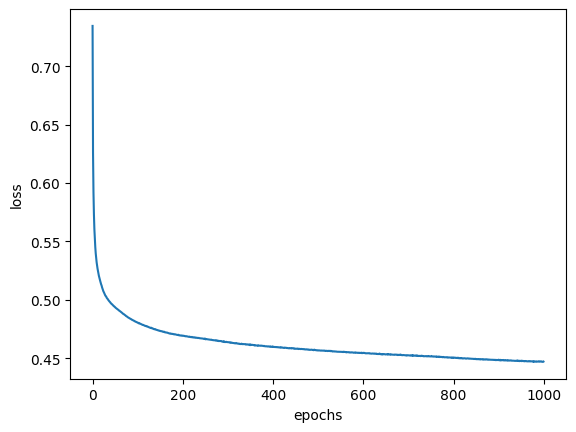

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.5320576429367065
0.44527745246887207


In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

number_of_input_features = 17  # Number of input features in the dataset

# Reduced number of hidden units to 5 and just using 1 hidden layer
number_of_hidden_units = 10  # Number of hidden units in the neural network
epochs = 200  # Number of training epochs
learning_rate = 0.001  # Learning rate for the optimizer
batch_size = 100  # Number of samples in each training batch
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer
landa = 0.01  # Regularization term (lambda)

# Convert training and testing data to PyTorch tensors
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)
X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

# Create a training dataset and data loader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    Tanh(),  # Add Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),  # Another linear layer
    Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 50 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

epoch 0/200 ---> train_accuracy: 0.7845714092254639, validation_accuracy: 0.7913333177566528
epoch 1/200 ---> train_accuracy: 0.7852857112884521, validation_accuracy: 0.793666660785675
epoch 2/200 ---> train_accuracy: 0.7854285836219788, validation_accuracy: 0.793666660785675
epoch 3/200 ---> train_accuracy: 0.7855714559555054, validation_accuracy: 0.793666660785675
epoch 4/200 ---> train_accuracy: 0.7855714559555054, validation_accuracy: 0.7933333516120911
epoch 5/200 ---> train_accuracy: 0.7852857112884521, validation_accuracy: 0.793666660785675
epoch 6/200 ---> train_accuracy: 0.7854285836219788, validation_accuracy: 0.793666660785675
epoch 7/200 ---> train_accuracy: 0.7847142815589905, validation_accuracy: 0.793666660785675
epoch 8/200 ---> train_accuracy: 0.7847142815589905, validation_accuracy: 0.7940000295639038
epoch 9/200 ---> train_accuracy: 0.7847142815589905, validation_accuracy: 0.7940000295639038
epoch 10/200 ---> train_accuracy: 0.7851428389549255, validation_accuracy: 0

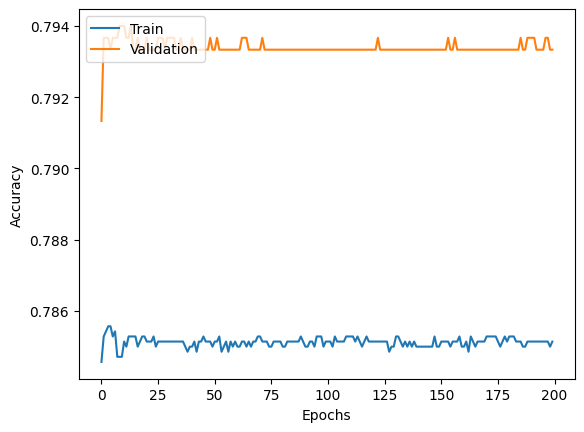

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
Y_pred = model(X_test_tensor)

In [ ]:
print(confusion_matrix(testing_data['Depression'], Y_pred.round().reshape(-1).detach()))
print(classification_report(testing_data['Depression'], Y_pred.round().reshape(-1).detach()))

[[2380    1]
 [ 617    2]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      2381
           1       0.67      0.00      0.01       619

    accuracy                           0.79      3000
   macro avg       0.73      0.50      0.45      3000
weighted avg       0.77      0.79      0.70      3000



**RNN**

In [ ]:
# copy of dataset for rnn
data_rnn = selected_df_features.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = data_rnn.groupby('Patient_ID')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 70:30 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.3, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((7003, 19), (2997, 19))

In [ ]:
# Check missing values for training
missing_val = train_df.isnull().sum()
print(missing_val)

Age_at_Exam            0
sBP                    3
BMI                   33
LDL                   48
HDL                   45
A1c                    0
TG                    33
FBS                    1
FBS>DM                 0
Total_Cholesterol    138
Diabetes               0
HTN                    0
OA                     0
COPD                   0
Sex                    0
A1C_BEF_DM             0
FBS_BEF_DM             0
Depression             0
Patient_ID             0
dtype: int64


In [ ]:
# missing values & numerical data imputation
for i in numerical_columns:
  train_df[i].fillna(train_df[i].median(), inplace=True)
missing_val = train_df.isnull().sum()
print(missing_val)

Age_at_Exam          0
sBP                  0
BMI                  0
LDL                  0
HDL                  0
A1c                  0
TG                   0
FBS                  0
FBS>DM               0
Total_Cholesterol    0
Diabetes             0
HTN                  0
OA                   0
COPD                 0
Sex                  0
A1C_BEF_DM           0
FBS_BEF_DM           0
Depression           0
Patient_ID           0
dtype: int64


In [ ]:
# Check missing values for testing
missing_val = test_df.isnull().sum()
print(missing_val)

Age_at_Exam           0
sBP                   1
BMI                  17
LDL                  22
HDL                  27
A1c                   0
TG                   20
FBS                   0
FBS>DM                0
Total_Cholesterol    69
Diabetes              0
HTN                   0
OA                    0
COPD                  0
Sex                   0
A1C_BEF_DM            0
FBS_BEF_DM            0
Depression            0
Patient_ID            0
dtype: int64


In [ ]:
# missing values & numerical data imputation
for i in numerical_columns:
  test_df[i].fillna(test_df[i].median(), inplace=True)
missing_val = test_df.isnull().sum()
print(missing_val)

Age_at_Exam          0
sBP                  0
BMI                  0
LDL                  0
HDL                  0
A1c                  0
TG                   0
FBS                  0
FBS>DM               0
Total_Cholesterol    0
Diabetes             0
HTN                  0
OA                   0
COPD                 0
Sex                  0
A1C_BEF_DM           0
FBS_BEF_DM           0
Depression           0
Patient_ID           0
dtype: int64


In [ ]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,HTN,OA,COPD,Sex,A1C_BEF_DM,FBS_BEF_DM,Depression,Patient_ID
9083,-0.313905,0.802707,0.588490,0.890748,-0.172730,0.875494,0.674019,0.747953,1,0.966249,1,0,0,0,1,0,0,0,3005000000126341
2656,-0.085029,-0.260870,-0.916526,-0.173217,1.051462,-0.594954,-0.544004,-0.473748,1,0.021359,0,0,0,0,1,2,2,1,1001000000123976
3240,-0.008737,2.338984,2.265955,-0.373368,-0.397581,-1.015082,-0.706407,-0.299219,1,-0.711593,0,0,1,0,0,2,2,0,1003000000052069
4805,-1.153118,-0.497220,1.025885,-0.636726,-0.922235,-0.279858,-0.412052,-0.182867,1,-0.102272,0,0,1,0,1,2,2,1,4001000000051180
8363,0.601599,0.507269,-1.120330,-0.046805,-0.672400,-0.384890,-0.391751,-0.531924,1,-0.446671,1,1,0,0,1,0,0,0,1003000000058525


In [ ]:
# Checking the class distribution in the 'Depression' column of the training set
class_distribution = train_df.groupby('Patient_ID').apply(lambda x : x.iloc[-1]['Depression']).value_counts()
class_distribution

0.0    4752
1.0    1269
dtype: int64

In [ ]:
train_df[train_df['Patient_ID'] == 582840]['Depression']

Series([], Name: Depression, dtype: int64)

In [ ]:
len(train_df['Patient_ID'].unique())

6021

In [ ]:
from sklearn.utils import resample

# Grouping the original training data by 'patient_nbr'
grouped_by_patient = train_df.groupby('Patient_ID')

# Creating separate lists for each class
groups_class_0 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Depression'].iloc[-1] == 0]
groups_class_1 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Depression'].iloc[-1] == 1]

In [ ]:
groups_class_0[0]['Patient_ID'] = -1

In [ ]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Oversampling the minority groups (class 1 and class 2)
# Using resample to duplicate records in groups_class_1 to match the number of records in groups_class_0
oversampled_groups_class_1 = resample(groups_class_1, replace=True, n_samples=len(groups_class_0), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = oversampled_groups_class_1 + groups_class_0

# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'Patient_ID'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

9504it [00:04, 2254.18it/s]


In [ ]:
# Reassembling the balanced training dataset
train_df_balanced = pd.concat(balanced_groups_copy, ignore_index=True)

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('Patient_ID').apply(lambda x : x.iloc[-1]['Depression']).value_counts())

1.0    4752
0.0    4752
dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'Patient_ID' and create sequences
grouped = train_df_balanced.groupby('Patient_ID', sort=False)
sequences = [group.drop(columns=['Patient_ID', 'Depression']).values for _, group in grouped]
targets = [group['Depression'].iloc[-1] for _, group in grouped]  # Assuming all records for a patient have the same target

# Padding sequences
max_length = max(len(s) for s in sequences)
# We cal also go with max_length
padded_sequences = pad_sequences(sequences, maxlen=5, padding='post', dtype='float')

padded_sequences.shape

(9504, 5, 17)

In [ ]:
#Testing sequences

# Group by 'patient_nbr' and create sequences
grouped_test = test_df.groupby('Patient_ID', sort=False)
sequences_test = [group.drop(columns=['Patient_ID', 'Depression']).values for _, group in grouped_test]
targets_test = [group['Depression'].iloc[-1] for _, group in grouped_test]  # Assuming all records for a patient have the same target

# Padding sequences for the test set
padded_sequences_test = pad_sequences(sequences_test, maxlen=5, padding='post', dtype='float')

padded_sequences_test.shape

(2581, 5, 17)

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 15  # Number of hidden units in RNN
num_classes = 2  # For two-class classification
epochs = 35
learning_rate = 0.01
batch_size = 100
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.3)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.4)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/35 ---> Train Accuracy: 60.58501683501684%, Validation Accuracy: 67.33824099186361%
Epoch 1/35 ---> Train Accuracy: 62.51052188552188%, Validation Accuracy: 65.01356063541263%
Epoch 2/35 ---> Train Accuracy: 62.48947811447812%, Validation Accuracy: 63.50251840371949%
Epoch 3/35 ---> Train Accuracy: 62.24747474747475%, Validation Accuracy: 63.46377373111197%
Epoch 4/35 ---> Train Accuracy: 63.25757575757576%, Validation Accuracy: 64.35490120108486%
Epoch 5/35 ---> Train Accuracy: 64.01515151515152%, Validation Accuracy: 61.449050755521114%
Epoch 6/35 ---> Train Accuracy: 63.1523569023569%, Validation Accuracy: 68.38434715226656%
Epoch 7/35 ---> Train Accuracy: 63.93097643097643%, Validation Accuracy: 61.332816737698565%
Epoch 8/35 ---> Train Accuracy: 63.5942760942761%, Validation Accuracy: 50.52305308020147%
Epoch 9/35 ---> Train Accuracy: 64.39393939393939%, Validation Accuracy: 57.497094149554435%
Epoch 10/35 ---> Train Accuracy: 64.5307239057239%, Validation Accuracy: 62.030

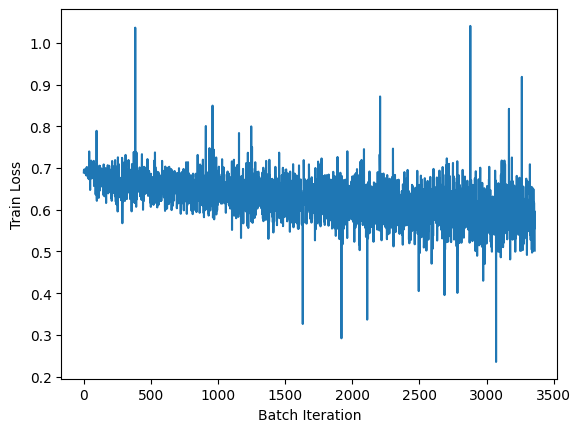

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

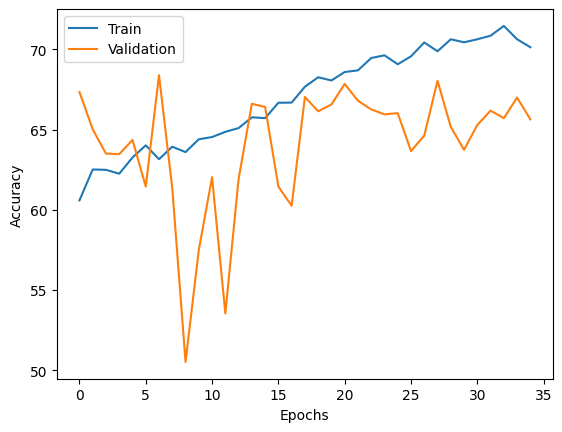

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


**LSTM**

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 15  # Number of hidden units in RNN
num_classes = 2  # For two-class classification
epochs = 35
learning_rate = 0.01
batch_size = 100
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.3)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.4)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/35 ---> Train Accuracy: 60.111531986531986%, Validation Accuracy: 51.64664858581945%
Epoch 1/35 ---> Train Accuracy: 61.6266835016835%, Validation Accuracy: 65.01356063541263%
Epoch 2/35 ---> Train Accuracy: 61.763468013468014%, Validation Accuracy: 52.07283998450213%
Epoch 3/35 ---> Train Accuracy: 63.82575757575758%, Validation Accuracy: 57.380860131731886%
Epoch 4/35 ---> Train Accuracy: 64.3097643097643%, Validation Accuracy: 57.34211545912437%
Epoch 5/35 ---> Train Accuracy: 65.29882154882155%, Validation Accuracy: 64.97481596280511%
Epoch 6/35 ---> Train Accuracy: 65.63552188552188%, Validation Accuracy: 57.72956218519953%
Epoch 7/35 ---> Train Accuracy: 65.16203703703704%, Validation Accuracy: 64.58736923672996%
Epoch 8/35 ---> Train Accuracy: 66.75084175084174%, Validation Accuracy: 65.28477334366525%
Epoch 9/35 ---> Train Accuracy: 67.8766835016835%, Validation Accuracy: 64.85858194498256%
Epoch 10/35 ---> Train Accuracy: 68.68686868686869%, Validation Accuracy: 62.146

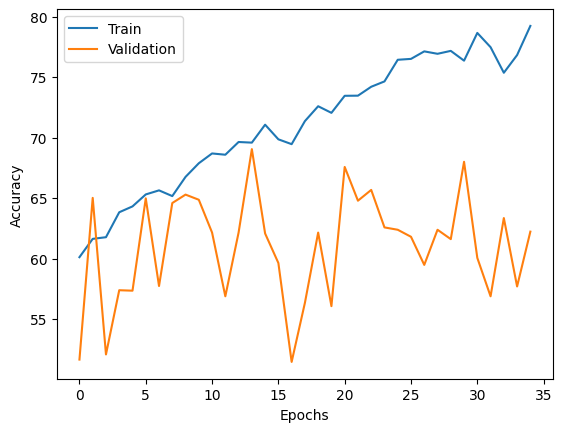

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()